In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [3]:
#crime=pd.read_csv(r'C:\Users\Rachel\Desktop\ML\final\crime19.csv')\
crime=pd.read_csv(r'C:\Users\Me\Desktop\ML\final\Crime_Data_from_2010_to_2019.csv')\


In [4]:
print(crime.shape)

(2115055, 28)


In [5]:
crime.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA ', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

In [6]:
labels=crime[['AREA ', 'AREA NAME', 'Crm Cd','Crm Cd Desc', 'Premis Cd','Premis Desc','Weapon Used Cd', 'Weapon Desc','Status','Status Desc']]

In [7]:
crime=crime.drop(['DATE OCC', 'AREA NAME',
       'Crm Cd Desc','Mocodes',
          'Premis Desc',
        'Weapon Desc',  'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'Cross Street', 'LAT','LON'], axis=1)

In [8]:
crime=crime.rename(columns={'TIME OCC':'time' ,'DR_NO':'id', 'Date Rptd':'date', 'AREA ':'area', 'Rpt Dist No':'district_number', 'Part 1-2':'part', 'Crm Cd':'crime_code', 
       'Vict Age':'age', 'Vict Sex':'sex', 'Vict Descent':'descent', 'Premis Cd':'premis', 
       'Weapon Used Cd':'weapon', 'Status':'status', 'LOCATION':'location'})

In [9]:
crime.isnull().sum()

id                       0
date                     0
time                     0
area                     0
district_number          0
part                     0
crime_code               0
age                      0
sex                 196671
descent             196717
premis                  53
weapon             1404685
status                   3
location                 0
dtype: int64

In [10]:
token='N'
crime.sex=crime.sex.fillna(token)
crime.weapon=crime.weapon.fillna(token)
crime.descent=crime.descent.fillna(token)

crime=crime.dropna(how='any')
print(crime.isnull().sum())

id                 0
date               0
time               0
area               0
district_number    0
part               0
crime_code         0
age                0
sex                0
descent            0
premis             0
weapon             0
status             0
location           0
dtype: int64


In [11]:
crime['month_year'] =pd.to_datetime(crime['date']).dt.to_period('M')
crime=crime.drop(['date'], axis=1)

In [12]:
# there are many data which age = 0 doesn't make any  sense
crime[crime.age==0].shape

(369863, 14)

In [13]:
# make timeline same with budget
crime_11_12=crime[crime.month_year>'2011-11'].sort_values(by='month_year').reset_index(drop=True)

### Budegt

In [19]:
#budget=pd.read_csv(r'C:\Users\Rachel\Desktop\ML\final\budget.csv')
budget=pd.read_csv(r'C:\Users\Me\Desktop\ML\final\Police_Budget_Activity.csv')

In [20]:
#drop columns after total expenditures
budget=budget.iloc[:,:32]

#drop missing values morethan 20000.
budget=budget.drop(['ADOPTED EXPENSE BUDGET','REVENUE SOURCE CATEGORY','REVENUE SOURCE CATEGORY NAME','REVENUE SOURCE CLASS','REVENUE SOURCE CLASS NAME','REVENUE SOURCE','REVENUE SOURCE NAME'], axis=1)
#drop same values columns
#'DEPARTMENT', 'DEPARTMENT NAME','AFR TYPE','DEPARTMENTAL INDICATOR','FUND GROUP','FUND GROUP NAME'bu
budget=budget.drop(['FUND GROUP NAME','FUND NAME','FISCAL PERIOD NAME','FUND TYPE NAME','DEPARTMENT', 'DEPARTMENT NAME','ACCOUNT NAME', 'CAFR TYPE','ACCOUNT TYPE NAME','DEPARTMENTAL INDICATOR','ACCOUNT GROUP NAME','FUND GROUP','FUND GROUP NAME'], axis=1)

In [21]:
token='UNK'
budget=budget.fillna(token)

In [22]:
a=budget.columns.map(lambda x: x.lower().replace(' ', '_'))
budget.columns=a
budget['month_year']=pd.to_datetime(budget['fiscal_period'], format='%Y%m').dt.to_period('M')
budget=budget.drop(['fiscal_period'], axis=1)
budget=budget.sort_values(by='month_year').reset_index(drop=True)

In [23]:
# total cases of crime by month
total=crime_11_12.groupby(['month_year']).size().to_frame()
crime_11_12=pd.merge(crime_11_12, total, on='month_year',how='left')

In [24]:
#total budget by month
total_budget=budget.groupby('month_year')['total_expenditures'].sum().to_frame()
crime_11_12=pd.merge(crime_11_12,total_budget, on='month_year', how='left')

In [25]:
crime_11_12

,id,time,area,district_number,part,crime_code,age,sex,descent,premis,weapon,status,location,month_year,0,total_expenditures
0,111721860,2200,17,1756,1,330,32,M,A,104.0,N,IC,17600 MAYALL ST,2011-12,16246,6.820457e+08
1,111522020,2245,15,1527,1,442,0,M,W,404.0,N,IC,11000 VICTORY BL,2011-12,16246,6.820457e+08
2,111432710,1220,14,1483,1,510,0,N,N,101.0,N,IC,LINCOLN,2011-12,16246,6.820457e+08
3,111924380,1200,19,1987,2,354,55,M,O,501.0,N,IC,8600 KATHERINE AV,2011-12,16246,6.820457e+08
4,110120970,2020,1,191,1,510,0,N,N,101.0,N,IC,17TH ST,2011-12,16246,6.820457e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1732870,201711824,1400,17,1761,1,331,49,M,O,509.0,N,IC,21500 LASSEN ST,2020-08,8,1.447240e+08
1732871,201912858,1,19,1969,1,121,26,F,O,502.0,400,IC,ARLETA,2020-08,8,1.447240e+08
1732872,200115750,1620,1,121,2,354,36,F,B,710.0,N,IC,900 W TEMPLE ST,2020-08,8,1.447240e+08
1732873,202012875,1000,20,2029,2,649,42,M,W,502.0,N,IC,500 S WESTMORELAND AV,2020-08,8,1.447240e+08


In [26]:
#rename 
crime_new=crime_11_12.rename(columns={0:'total_crime'})

In [27]:
crime_new=crime_new.drop(columns=['id', 'location'], axis=1)

In [28]:
crime_new['total_expenditures']=crime_new['total_expenditures'].map(lambda x: "{:.2f}".format(float(x)))

In [29]:
# change data type of time to hours and minutes
crime_new['time']=crime_new['time'].astype('str')
crime_new['time']=['{0}'.format(i.zfill(4)) for i in crime_new['time']]
crime_new['time']=pd.to_datetime(crime_new['time'],format='%H%M').dt.strftime('%H:%M')

In [30]:
crime_new.head()

,time,area,district_number,part,crime_code,age,sex,descent,premis,weapon,status,month_year,total_crime,total_expenditures
0,22:00,17,1756,1,330,32,M,A,104.0,N,IC,2011-12,16246,682045743.42
1,22:45,15,1527,1,442,0,M,W,404.0,N,IC,2011-12,16246,682045743.42
2,12:20,14,1483,1,510,0,N,N,101.0,N,IC,2011-12,16246,682045743.42
3,12:00,19,1987,2,354,55,M,O,501.0,N,IC,2011-12,16246,682045743.42
4,20:20,1,191,1,510,0,N,N,101.0,N,IC,2011-12,16246,682045743.42


In [106]:
temp=[]
# 根据差值进行打分
for i in crime_new['time']:
    a = 0
    if (i >= "00:00") and (i <="06:00"):
        a= 0
    elif (i>'06:00') and (i <='12:00'):
        a=1
    elif (i>'12:00') and (i<='18:00'):
        a=2
    else:
        a=3
    temp.append(a)

In [107]:
crime_new['time_class']=temp

In [108]:
#0: midnight 1: morning 2:afternoon 3:evening
crime_new.head()

,time,time_class,area,district_number,part,crime_code,age,sex,descent,premis,weapon,status,month_year,total_crime,total_expenditures
0,22:00,3,17,1756,1,330,32,M,A,104.0,N,IC,2011-12,16246,682045743.42
1,22:45,3,15,1527,1,442,0,M,W,404.0,N,IC,2011-12,16246,682045743.42
2,12:20,2,14,1483,1,510,0,N,N,101.0,N,IC,2011-12,16246,682045743.42
3,12:00,1,19,1987,2,354,55,M,O,501.0,N,IC,2011-12,16246,682045743.42
4,20:20,3,1,191,1,510,0,N,N,101.0,N,IC,2011-12,16246,682045743.42


In [109]:
# move time_class to front
mid = crime_new['time_class']
crime_new.drop(labels=['time_class'], axis=1, inplace = True)
crime_new.insert(1, 'time_class', mid)

In [110]:
crime_new.head()

,time,time_class,area,district_number,part,crime_code,age,sex,descent,premis,weapon,status,month_year,total_crime,total_expenditures
0,22:00,3,17,1756,1,330,32,M,A,104.0,N,IC,2011-12,16246,682045743.42
1,22:45,3,15,1527,1,442,0,M,W,404.0,N,IC,2011-12,16246,682045743.42
2,12:20,2,14,1483,1,510,0,N,N,101.0,N,IC,2011-12,16246,682045743.42
3,12:00,1,19,1987,2,354,55,M,O,501.0,N,IC,2011-12,16246,682045743.42
4,20:20,3,1,191,1,510,0,N,N,101.0,N,IC,2011-12,16246,682045743.42


In [111]:
crimeCorr_new = crime_new.corr()
crimeCorr_new


,time_class,area,district_number,part,crime_code,age,premis,total_crime
time_class,1.000000,0.008473,0.008671,-0.063721,0.014714,-0.052340,-0.097116,0.008283
area,0.008473,1.000000,0.999017,0.005001,-0.003881,0.005392,0.006944,-0.010107
district_number,0.008671,0.999017,1.000000,0.004863,-0.003900,0.005595,0.006893,-0.009971
part,-0.063721,0.005001,0.004863,1.000000,0.728358,0.139943,0.229616,-0.028289
crime_code,0.014714,-0.003881,-0.003900,0.728358,1.000000,-0.036265,0.105259,-0.004485
age,-0.052340,0.005392,0.005595,0.139943,-0.036265,1.000000,0.162575,-0.000484
premis,-0.097116,0.006944,0.006893,0.229616,0.105259,0.162575,1.000000,-0.036873
total_crime,0.008283,-0.010107,-0.009971,-0.028289,-0.004485,-0.000484,-0.036873,1.000000


In [112]:
#There is a very strong correlation between area and district number.  
#Therefore, we should remove district_number from the variables.  
#There is also a moderately strong correlation between crime_code and part.
#We may want to look further if one of these variables can be removed.

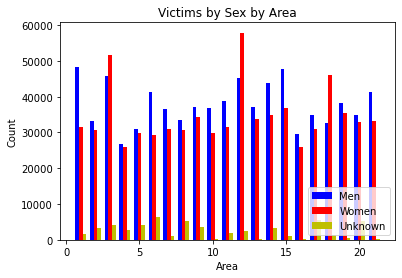

In [113]:
#print(crime_new.groupby('area').count())
crime_new1 = crime_new[crime_new.sex.isin(['M','F','X'])]
men = crime_new1[crime_new1.sex.isin(['M'])].groupby('area').count().sex
women = crime_new1[crime_new1.sex.isin(['F'])].groupby('area').count().sex
unknown = crime_new1[crime_new1.sex.isin(['X'])].groupby('area').count().sex
indices = sorted(crime_new.area.unique())
#Calculate optimal width
width = np.min(np.diff(indices))/4

plt.bar(indices-width,men,width,color='b',label='Men')
plt.bar(indices,women,width,color='r',label='Women')
plt.bar(indices+width,unknown,width,color='y',label='Unknown')
plt.xlabel('Area')
plt.ylabel('Count')
plt.title('Victims by Sex by Area')
plt.legend(loc='lower right')
plt.show()


In [ ]:
#It appears areas 3 (Southwest) and 12 (77th Street) have the overal highest crime, 
#whereas areas 4 (Hollenbeck) and 16 (Foothill) have the lowest crime rates.
#In most areas, more victims are males, except in areas 3 (Southwest), 12 (77th Street), and 18 (Southeast).

In [118]:
#print(crime_new.groupby('area').count())
lateNight = crime_new[crime_new.time_class.isin([0])].groupby('area').count().time_class
morning = crime_new[crime_new.time_class.isin([1])].groupby('area').count().time_class
afternoon = crime_new[crime_new.time_class.isin([2])].groupby('area').count().time_class
evening = crime_new[crime_new.time_class.isin([3])].groupby('area').count().time_class
indices = sorted(crime_new.area.unique())
#Calculate optimal width
width = np.min(np.diff(indices))/5


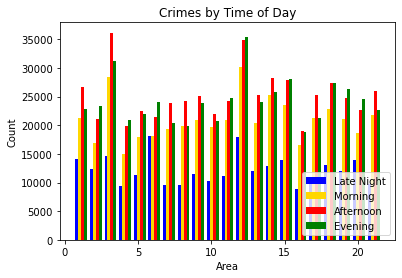

In [119]:
plt.bar(indices-width,lateNight,width,color='b',label='Late Night')
plt.bar(indices,morning,width,color='gold',label='Morning')
plt.bar(indices+width,afternoon,width,color='r',label='Afternoon')
plt.bar(indices+width+width,evening,width,color='g',label='Evening')
plt.xlabel('Area')
plt.ylabel('Count')
plt.title('Crimes by Time of Day')
plt.legend(loc='lower right')
plt.show()

In [ ]:
#It can be seen from the graphs, that most of the crime happens in the afternoons and evenings.  
#The least amount of crime happens late at night between midnight and 6AM.